In [ ]:
!git clone https://github.com/cwmok/LapIRN

Cloning into 'LapIRN'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 129 (delta 49), reused 75 (delta 42), pack-reused 45
Receiving objects: 100% (129/129), 12.34 MiB | 15.13 MiB/s, done.
Resolving deltas: 100% (66/66), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torch==1.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nibabel as nib
import numpy as np
import os
import tensorflow as tf

In [ ]:
pip install voxelmorph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import voxelmorph as vxm

In [ ]:
ruta_guardado = '/Result/'

os.mkdir(ruta_guardado)

FileExistsError: ignored

In [ ]:
ruta_carpeta = '/content/drive/MyDrive/tfg/imagenesCNresized/'

lista_imagenes = os.listdir(ruta_carpeta)

gpu = 0
device, nb_devices = vxm.tf.utils.setup_device(gpu)

with tf.device(device):

  for nombre_imagen in lista_imagenes:
    imagen_moving = ruta_carpeta + nombre_imagen
    nombre_sin_extension = nombre_imagen.rstrip(".nii")
    path_guardado = ruta_guardado + nombre_sin_extension
    print(path_guardado)
    comando = f"python /content/LapIRN/Code/Test_LapIRN_diff_resize.py --modelpath /content/LapIRN/Model/LapIRN_diff_fea7.pth --savepath {path_guardado} --fixed /content/drive/MyDrive/tfg/altas1LapIRN.nii --moving {imagen_moving}"
    !{comando}

/Result/002_S_0295_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/002_S_0685_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/003_S_0907_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/002_S_0559_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/002_S_1261_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/002_S_0413_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/002_S_1280_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/003_S_0981_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/003_S_1021_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/003_S_0931_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/005_S_0223_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/005_S_0553_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/005_S_0602_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/005_S_0610_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/006_S_0498_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/006_S_0484_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/006_S_0681_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/006_S_0731_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/007_S_0070_ADNI1_MPRAGE_N3-NoSkull
Finished
/Result/007_

In [ ]:
ruta_carpeta = '/Result/'
imagen = '/warpped_moving.nii.gz'

sumaImagenes = np.zeros((176,208,176))
lista_imagenes = os.listdir(ruta_carpeta)

for nombre_imagen in lista_imagenes:
  ruta = ruta_carpeta + nombre_imagen + imagen
  print(ruta)
  if ruta != '/Result/.ipynb_checkpoints/warpped_moving.nii.gz':
    datos_imagen = nib.load(ruta).get_fdata()
    sumaImagenes = sumaImagenes + datos_imagen

/Result/020_S_0883_ADNI1_MPRAGE_N3-NoSkull/warpped_moving.nii.gz
/Result/010_S_0067_ADNI1_MPRAGE_N3-NoSkull/warpped_moving.nii.gz
/Result/035_S_0156_ADNI1_MPRAGE_N3-NoSkull/warpped_moving.nii.gz
/Result/041_S_0898_ADNI1_MPRAGE_N3-NoSkull/warpped_moving.nii.gz
/Result/941_S_1195_ADNI1_MPRAGE_N3-NoSkull/warpped_moving.nii.gz
/Result/011_S_0008_ADNI1_MPRAGE_N3-NoSkull/warpped_moving.nii.gz
/Result/032_S_0677_ADNI1_MPRAGE_N3-NoSkull/warpped_moving.nii.gz
/Result/128_S_0272_ADNI1_MPRAGE_N3-NoSkull/warpped_moving.nii.gz
/Result/100_S_0069_ADNI1_MPRAGE_N3-NoSkull/warpped_moving.nii.gz
/Result/002_S_1280_ADNI1_MPRAGE_N3-NoSkull/warpped_moving.nii.gz
/Result/010_S_0420_ADNI1_MPRAGE_N3-NoSkull/warpped_moving.nii.gz
/Result/032_S_0479_ADNI1_MPRAGE_N3-NoSkull/warpped_moving.nii.gz
/Result/137_S_0972_ADNI1_MPRAGE_N3-NoSkull/warpped_moving.nii.gz
/Result/037_S_0327_ADNI1_MPRAGE_N3-NoSkull/warpped_moving.nii.gz
/Result/013_S_0502_ADNI1_MPRAGE_N3-NoSkull/warpped_moving.nii.gz
/Result/033_S_0920_ADNI1_

In [ ]:
atlas_dos = sumaImagenes/len(lista_imagenes)
atlas_dos.shape

(176, 208, 176)

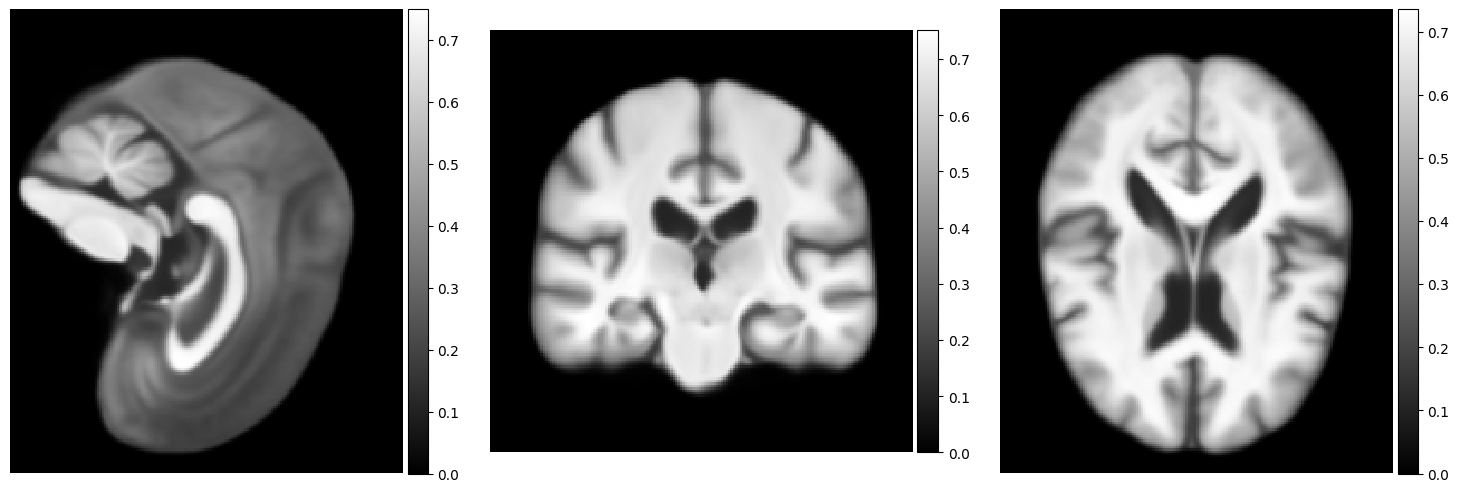

In [ ]:
import neurite as ne

vol_shape = (176, 208, 176)

mid_slices_atlas_dos = [np.take(atlas_dos, vol_shape[d]//2, axis=d) for d in range(3)]
mid_slices_atlas_dos[1] = np.rot90(mid_slices_atlas_dos[1], 1)
mid_slices_atlas_dos[2] = np.rot90(mid_slices_atlas_dos[2], -1)

ne.plot.slices(mid_slices_atlas_dos, cmaps=['gray'], do_colorbars=True);

In [ ]:
header = nib.Nifti1Header()
nifti_image = nib.Nifti1Image(atlas_dos, affine=np.eye(4), header=header)

nib.save(nifti_image, '/content/drive/MyDrive/tfg/altas2LapIRN.nii')